In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

all_samples = np.concatenate((class1_sample, class2_sample), axis=0)

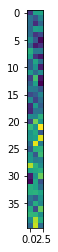

In [8]:
plt.imshow(all_samples)

In [10]:
# preprocessing, scale the variables as they can differ in unit

In [11]:
all_samples = scale(all_samples)

In [106]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=3)
sklearn_fit = sklearn_pca.fit(all_samples)
sklearn_transf = sklearn_fit.transform(all_samples)

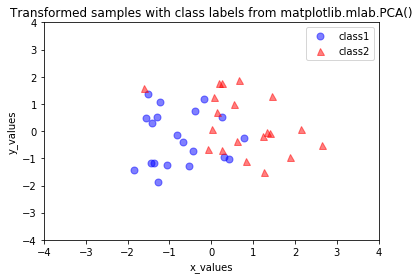

In [107]:
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [226]:
import pandas as pd

In [227]:
df = pd.read_pickle(r'D:\Projects\Pr\2695.40//selected_station_data.pkl')

In [228]:
# base
df_bs = df.ix[df.index[0]]
bs_df = df_bs['data'].loc[:,['t','height']].set_index('t')
bs_df.columns = [(df_bs['name'])]

for idx in df.index[1::]:
    df_sel = df.ix[idx]
    sel_df = df_sel['data'].loc[:,['t','height']].set_index('t')
    sel_df.columns = [str(df_sel['name'])]
    
    bs_df = bs_df.merge(sel_df, left_index=True, right_index=True, how='outer')

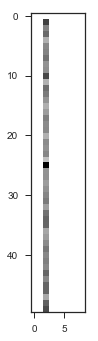

In [229]:
X = bs_df.as_matrix()
plt.imshow(X[0:50])

In [250]:
X = bs_df.as_matrix()
from sklearn.preprocessing import Imputer, scale
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(X)

In [303]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [304]:
X_std.shape

(2028, 9)

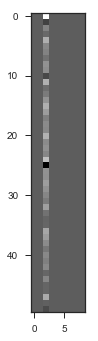

In [305]:
plt.imshow(X_std[0:50])

In [306]:
cor_mat2 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.35947096  0.05782713 -0.03599363  0.48896433  0.07930074  0.2771984
  -0.14810761 -0.58320131 -0.42645961]
 [-0.34945946  0.11487437  0.19628122  0.61347106  0.19998762  0.04454248
  -0.00896531  0.44425304  0.45868146]
 [-0.3336413   0.17147884  0.29407337 -0.53038097  0.64293586  0.27854532
   0.00579887 -0.02251373  0.00093122]
 [-0.35078903  0.1939758   0.26810585 -0.0535798  -0.04113058 -0.8271276
  -0.11782768 -0.00871366 -0.25451487]
 [-0.36973258  0.05702102 -0.07386489 -0.117878   -0.26965887 -0.04860678
   0.67395097 -0.38619918  0.4028113 ]
 [-0.36329211  0.08188648 -0.06056124 -0.1081488  -0.38208486  0.29459112
   0.25013906  0.54101155 -0.50785215]
 [-0.36388858  0.02713681 -0.11303961 -0.27070388 -0.43007284  0.15152056
  -0.6685176  -0.06483756  0.34892597]
 [-0.2953633  -0.35409623 -0.76932637 -0.0362537   0.3617792  -0.21724046
  -0.01177121  0.12529254 -0.01687023]
 [-0.16109483 -0.88337476  0.43365141 -0.01435515 -0.06408212  0.01228867
   0.01526

In [307]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.91687660601
0.95135089286
0.410019346477
0.247967123131
0.212688930719
0.114688677101
0.0649714569386
0.0573542268779
0.0240827398909


In [308]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

(0.5, 9.5)

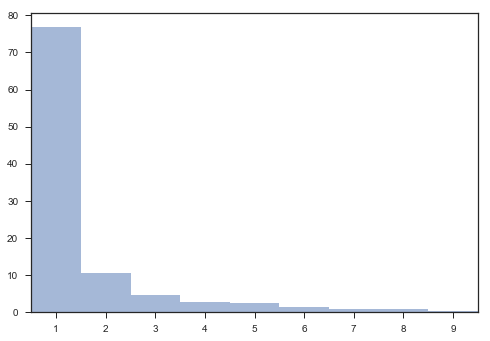

In [309]:
x_ = np.arange(1,int(tot)+1,1)
plt.bar(x_,var_exp, width=1, alpha=0.5)
plt.xlim(0.5,9.5)

In [341]:
eig_pairs[0][1].reshape(9,1)

array([[-0.35947096],
       [-0.34945946],
       [-0.3336413 ],
       [-0.35078903],
       [-0.36973258],
       [-0.36329211],
       [-0.36388858],
       [-0.2953633 ],
       [-0.16109483]])

In [339]:
np.hstack((eig_pairs[0][1], eig_pairs[1][1].reshape(9,1)))


ValueError: all the input arrays must have same number of dimensions

In [314]:

matrix_w_PC1 = np.hstack((eig_pairs[0][1].reshape(9,1)))
matrix_w_PC2 = np.hstack((eig_pairs[1][1].reshape(9,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [-0.35947096 -0.34945946 -0.3336413  -0.35078903 -0.36973258 -0.36329211
 -0.36388858 -0.2953633  -0.16109483]


In [332]:
YPC1 = X_std.dot(matrix_w_PC1)
YPC2 = X_std.dot(matrix_w_PC2)

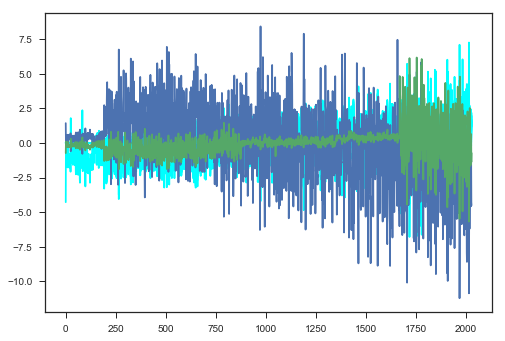

In [333]:
plt.plot(X_std, color='cyan')
plt.plot(YPC1)
plt.plot(YPC2)

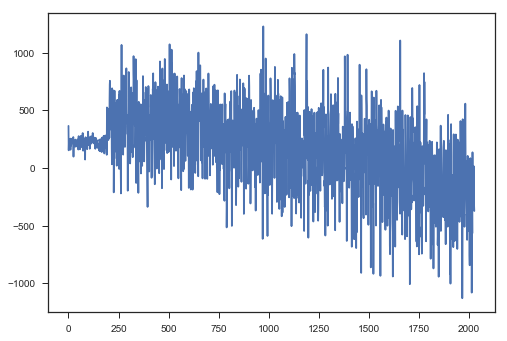

In [299]:
plt.plot(Y)

In [233]:
bs_df2 = pd.DataFrame(data=X, index=bs_df.index, columns=bs_df.columns)

In [234]:
bs_df2.head()

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
t,,,,,,,,,
1848-01-01,-87.227117,-122.830645,-554.0,-80.076253,-104.033443,-24.522478,-28.943531,-53.342014,-32.041667
1848-02-01,-87.227117,-122.830645,81.0,-80.076253,-104.033443,-24.522478,-28.943531,-53.342014,-32.041667
1848-03-01,-87.227117,-122.830645,-99.0,-80.076253,-104.033443,-24.522478,-28.943531,-53.342014,-32.041667
1848-04-01,-87.227117,-122.830645,-24.0,-80.076253,-104.033443,-24.522478,-28.943531,-53.342014,-32.041667
1848-05-01,-87.227117,-122.830645,-219.0,-80.076253,-104.033443,-24.522478,-28.943531,-53.342014,-32.041667


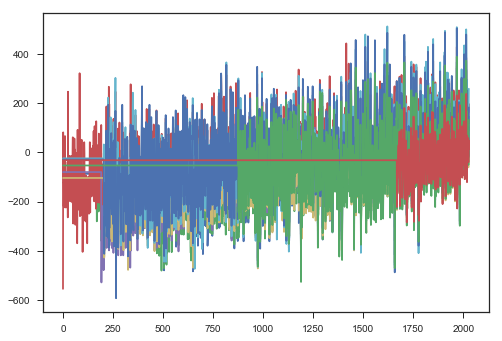

In [235]:
for st in range(X.shape[1]):
    plt.plot(X[:,st])
plt.show()

c:\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
c:\python35\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


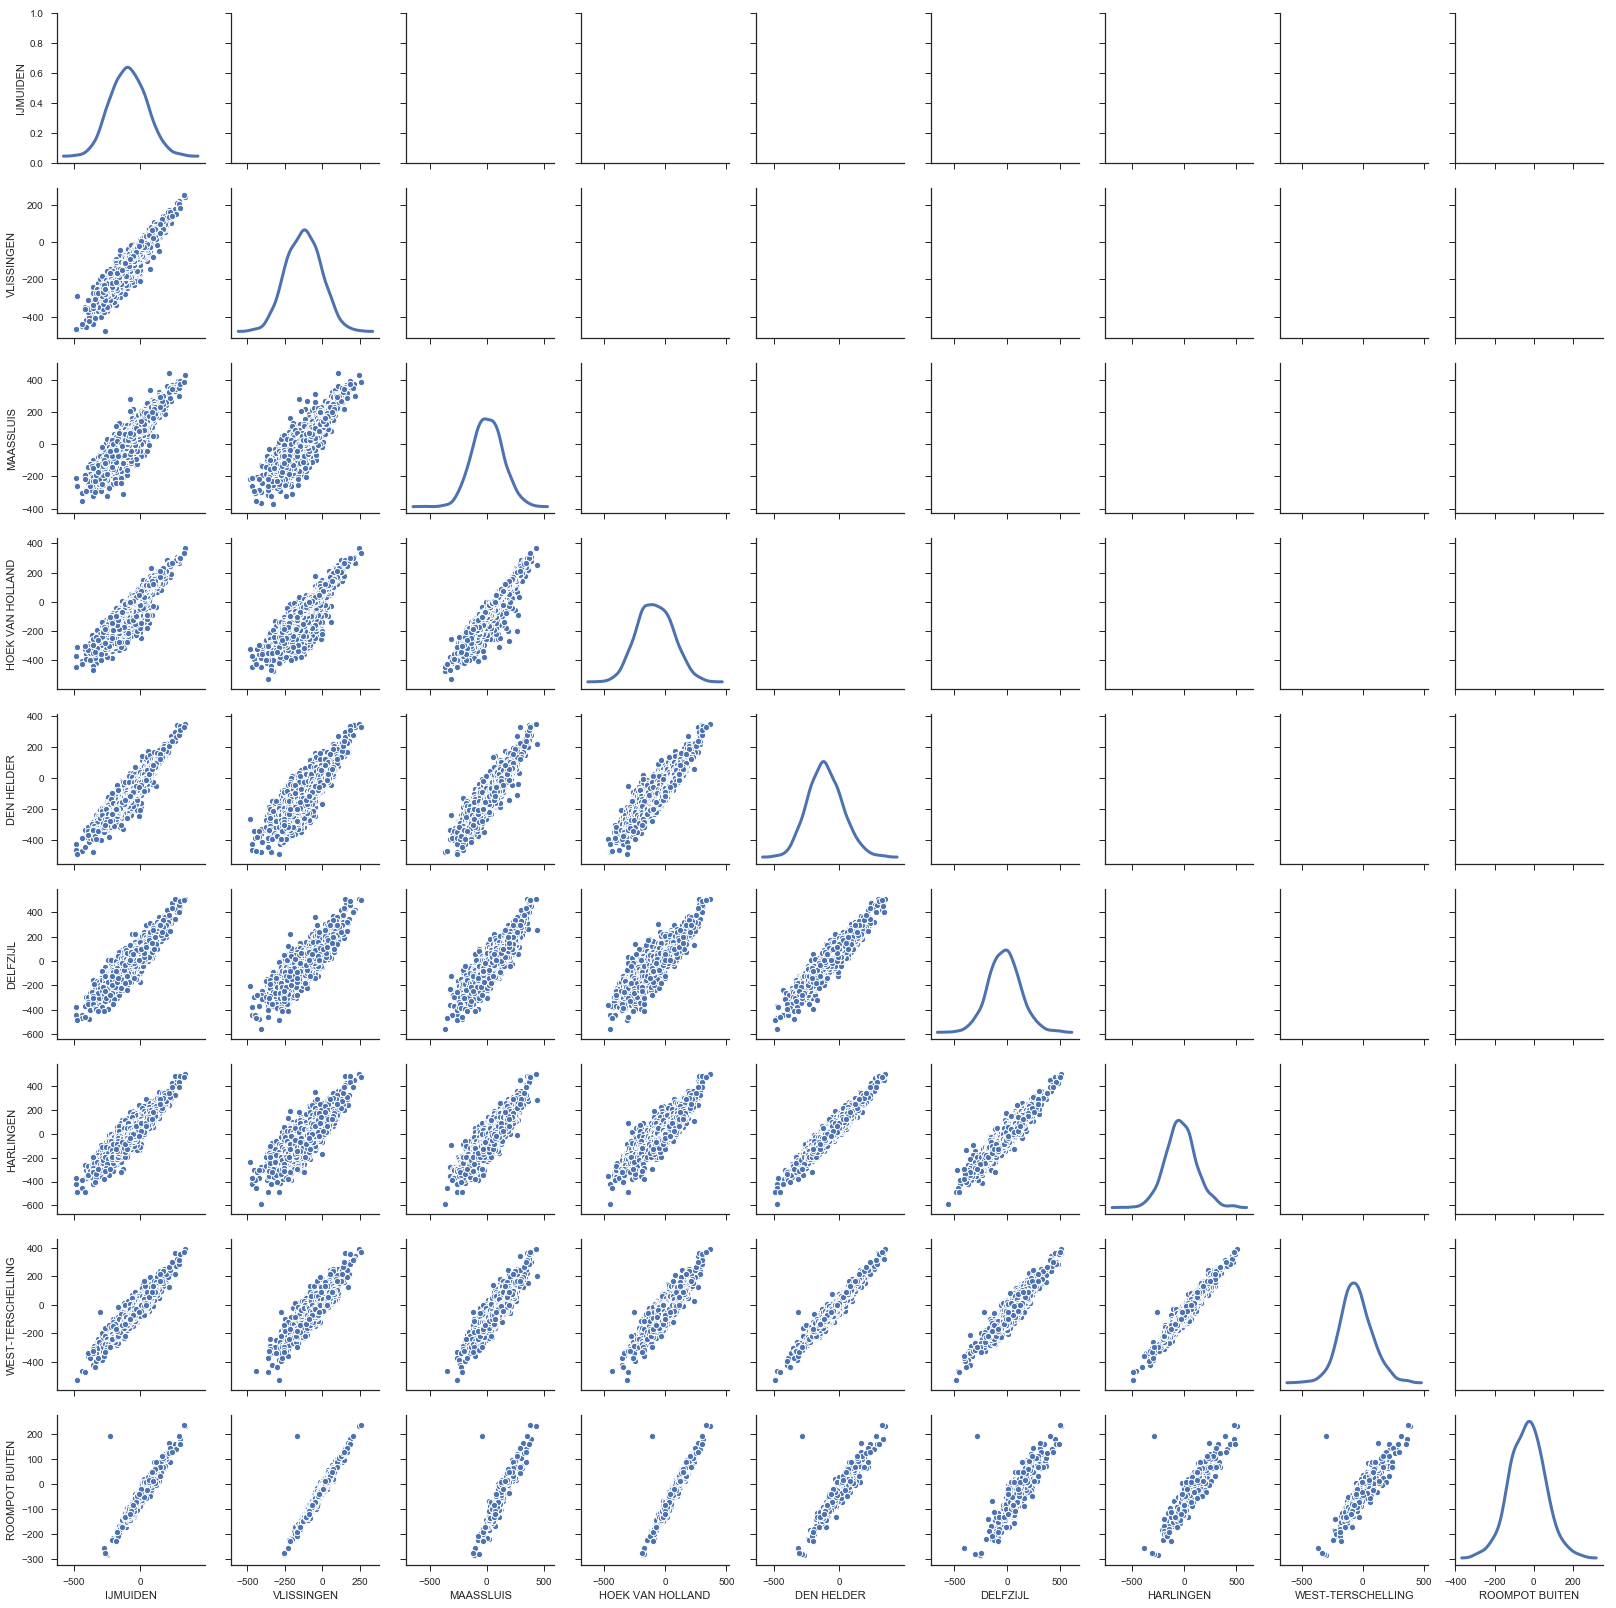

In [236]:
import seaborn as sns
sns.set(style="ticks")

#df = sns.load_dataset("iris")
g = sns.PairGrid(bs_df)
g = g.map_lower(plt.scatter, linewidths=1, edgecolor="w", s=40)
#g = g.map_upper(sns.jointplot, kind='hex')
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

In [237]:
bs_df

,IJMUIDEN,VLISSINGEN,MAASSLUIS,HOEK VAN HOLLAND,DEN HELDER,DELFZIJL,HARLINGEN,WEST-TERSCHELLING,ROOMPOT BUITEN
t,,,,,,,,,
1848-01-01,NaN,NaN,-554.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-02-01,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-03-01,NaN,NaN,-99.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-04-01,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-05-01,NaN,NaN,-219.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-06-01,NaN,NaN,-114.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-07-01,NaN,NaN,-104.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-08-01,NaN,NaN,-54.0,NaN,NaN,NaN,NaN,NaN,NaN
1848-09-01,NaN,NaN,-144.0,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=X.shape[1])
sklearn_fit = sklearn_pca.fit(X)
sklearn_transf = sklearn_fit.transform(X)

In [240]:
sklearn_fit.explained_variance_ratio_

array([ 0.85494344,  0.04801973,  0.02850141,  0.02669483,  0.01550382,
        0.00869761,  0.00819693,  0.00625047,  0.00319176])

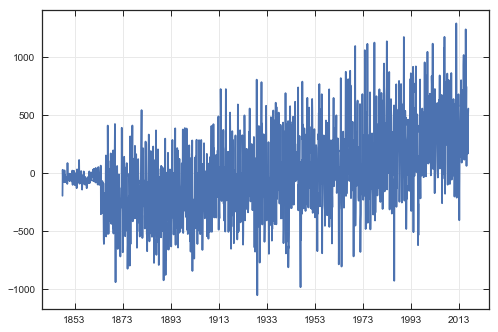

In [241]:
plt.plot(bs_df.index, sklearn_transf[:,0])
ax = plt.gca()
ax.get_yaxis().set_tick_params(direction='in')
ax.get_xaxis().set_tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.draw()
plt.grid(color='#E9E9E9')

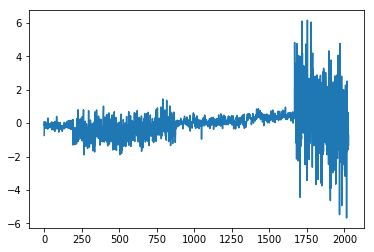

In [169]:
plt.plot(sklearn_transf[:,1])

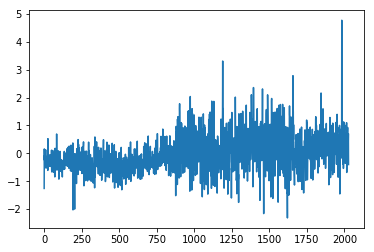

In [172]:
plt.plot(sklearn_transf[:,2])

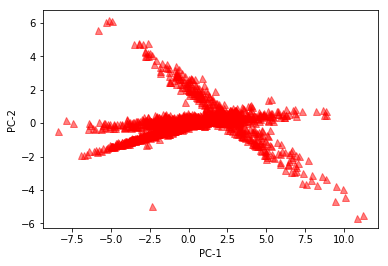

In [170]:
plt.plot(sklearn_transf[:,0], sklearn_transf[:,1], '^', markersize=7, color='red', alpha=0.5)
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()


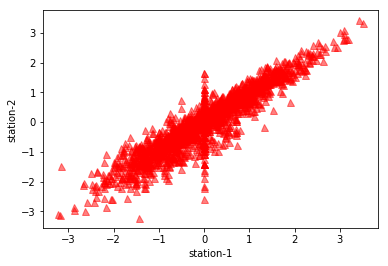

In [171]:
plt.plot(X[:,0], X[:,1], '^', markersize=7, color='red', alpha=0.5)
plt.xlabel('station-1')
plt.ylabel('station-2')
plt.show()
